<a href="https://colab.research.google.com/github/rochadelon/Uece-C-Jovem/blob/Ci%C3%AAncia-de-Dados-Intermedi%C3%A1rio/Oficina_5_Implementando_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Alan Delon Sousa Rocha
- C-Jovem - Uece - Ciência de Dados: Intermediário
- Disponível: https://colab.research.google.com/drive/1XBrDxKoW6Mbi554QGJUzVDVsR5Ox2JbQ?usp=sharing




## 1. Preparação


A bibliotecas necessárias são importadas para treinar o modelo de regressão linear. Foram usadas as seguintes bibliotecas e funções:
   ,  matplotlib para gerar um gráfico de

*  skitlearn: para treinar o modelo
- r2_score : para gerar métricas de avaliação.
*  matplotlib: para gerar um gráfico de comparação entre os valores reais de teste e os valores previstos.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

-  Para o para o treinamento e avaliação do modelo foram gerados dados de forma sintética para um total de duzentas tuplas com os seus respectivos atributos.
- O 'preço' de cada imóvel foi gerado a partir da soma ponderada dos valores de seus atributos acrescido do ruído que simula as variações de preço que ocorrem no mercado.

In [ ]:
np.random.seed(0)
area_lote = np.random.uniform(50, 200, 200)
ano_contrucao = np.random.randint(1900, 2025, 200)
area_primeiroandar = np.random.uniform(50, 200, 200)
area_segundoandar = np.random.uniform(50, 200, 200)
num_banheiros = np.random.randint(1, 5, 200)
num_quartos_acima = np.random.uniform(2, 6, 200)
num_quartos_acima_exc_ban = num_quartos_acima - num_banheiros
preco = (area_lote * 50 + ano_contrucao * 2 + area_primeiroandar * 100 +
         area_segundoandar * 80 + num_banheiros * 10000 + num_quartos_acima * 15000 +
         num_quartos_acima_exc_ban * 5000 + np.random.normal(0, 10000, 200))


df = pd.DataFrame({
    'area_lote': area_lote,
    'ano_contrucao': ano_contrucao,
    'area_primeiroandar': area_primeiroandar,
    'area_segundoandar': area_segundoandar,
    'num_banheiros': num_banheiros,
    'num_quartos_acima': num_quartos_acima,
    'num_quartos_acima_exc_ban': num_quartos_acima_exc_ban,
    'preco': preco
})

df.head()

,area_lote,ano_contrucao,area_primeiroandar,area_segundoandar,num_banheiros,num_quartos_acima,num_quartos_acima_exc_ban,preco
0,132.322026,1970,111.705862,91.666051,2,2.029873,0.029873,77508.994009
1,157.278405,1971,103.890713,184.229479,3,5.709610,2.709610,172876.145007
2,140.414506,1918,109.924837,53.978383,4,4.772611,0.772611,142419.551196
3,131.732477,1992,95.274631,143.845493,3,4.820590,1.820590,150545.069232
4,113.548220,1943,166.282967,99.431407,3,4.384260,1.384260,124259.485721


## 2. Pré-Processamento

- As variáveis independentes (x), que são os atributos que utilizaremos para prever o preco do imóvel, e a variávei dependente 'preco'(y), são determinadas. Assim como o dataset é dividido em dados de treino e dados de teste na proporção de 20 % para teste e 80% para o treinamento.

In [ ]:
X = df.drop('preco', axis=1)
y = df['preco']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Treinamento

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## 4. Avaliação

- Para a avaliação do modelo foi utilizado o seguinte parâmetro:
   - Coeficiente de Determinação R²: indica a a fração da variância total dos dados que é explicada pelo modelo. Ele varia entre 0 e 1 sendo 1 significa o modelo que ele perfeitamente a variabilidade dos dados.

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'R² Coeficiente de Determinação: {r2}')

Erro quadratico médio: 122649771.77528615
R² Coeficiente de Determinação: 0.8372957527505646


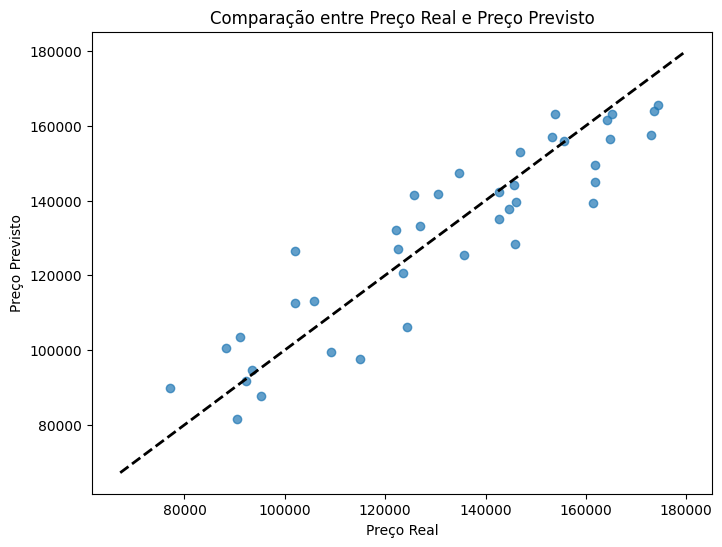

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Comparação entre Preço Real e Preço Previsto')
plt.show()

In [ ]:
### Exemplo

nova_casa = np.array([[10000, 1995, 2000, 1000, 3, 4, 1]])
preco_previsto = model.predict(nova_casa)
print(f'Preço previsto para a nova casa: R$ {preco_previsto[0].round(2)}')

Preço previsto para a nova casa: R$ 1201112.6


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Conclusão

  - Segundo o Coeficiente de Determinação o modelo está sendo capaz de prever 83% da variabilidade dos dados, o que é um bom resultado, mas ainda há cerca de 16% da variabilidade que não é explicada pelo modelo. Entretanto, somente o R² é insuficiente para a avaliar um modelo de regressaõ linear, podendendo ainda ser avaliado o Erro Quadrático Médio, por exemplo.